## Мегалайн

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. 

Цель проекта:

    Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
    Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

Тариф «Смарт»

	1. Ежемесячная плата: 550 рублей
	2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
	3. Стоимость услуг сверх тарифного пакета:
		○ минута разговора: 3 рубля
		○ сообщение: 3 рубля
		○ 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

	1. Ежемесячная плата: 1950 рублей
	2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
	3. Стоимость услуг сверх тарифного пакета:
		○ минута разговора: 1 рубль
		○ сообщение: 1 рубль
		○ 1 Гб интернет-трафика: 150 рублей

Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Шаг 1. Файл с данными и общая информация

### Библиотеки

Импортируем все используемые далее библиотеки.

In [235]:
import datetime as dt
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats as st

Убрираем длинные циферки.

In [236]:
pd.set_option('display.float_format', '{:,.3f}'.format)

Отключаем лишние предупреждения.

In [237]:
import warnings
warnings.filterwarnings('ignore')

In [238]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
except Exception:
    ! gdown --id 1zNfqwbOuyT0DGwRlowSDv8YWO8ghLsTV
    calls = pd.read_csv('/content/calls.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1zNfqwbOuyT0DGwRlowSDv8YWO8ghLsTV
To: /content/calls.csv
100% 6.03M/6.03M [00:00<00:00, 132MB/s]


In [239]:
try:
    internet = pd.read_csv('/datasets/internet.csv')
except Exception:
    ! gdown --id 1QHIqMjVXmDajT843xO1jfo1_8B161W9R
    internet = pd.read_csv('/content/internet.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QHIqMjVXmDajT843xO1jfo1_8B161W9R
To: /content/internet.csv
100% 5.58M/5.58M [00:00<00:00, 229MB/s]


In [240]:
try:
    messages = pd.read_csv('/datasets/messages.csv')
except Exception:
    ! gdown --id 1W6xeWGlrQ8RS5XlkDxbKjQI3IDujiqcb
    messages = pd.read_csv('/content/messages.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1W6xeWGlrQ8RS5XlkDxbKjQI3IDujiqcb
To: /content/messages.csv
100% 3.04M/3.04M [00:00<00:00, 200MB/s]


In [241]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except Exception:
    ! gdown --id 1eHsXKvJp-LXJqlBtS7r5tpS7VycpTirL
    tariffs = pd.read_csv('/content/tariffs.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eHsXKvJp-LXJqlBtS7r5tpS7VycpTirL
To: /content/tariffs.csv
100% 193/193 [00:00<00:00, 244kB/s]


In [242]:
try:
    users = pd.read_csv('/datasets/users.csv')
except Exception:
    ! gdown --id 1J27sixKmjKusO9fawRrIPMOFUWdVALdd
    users = pd.read_csv('/content/users.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1J27sixKmjKusO9fawRrIPMOFUWdVALdd
To: /content/users.csv
100% 37.0k/37.0k [00:00<00:00, 42.4MB/s]


### calls

Cмотрим таблички.

In [243]:
display('calls:', calls)

'calls:'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.760,1499
202603,1499_216,2018-10-18,18.830,1499
202604,1499_217,2018-11-10,10.810,1499
202605,1499_218,2018-10-06,4.270,1499


### internet

In [244]:
# столбец `unnamed_0` убираем в pd.read_csv(..., index_col=0)
display('internet:', internet)

'internet:'

,id,mb_used,session_date,user_id
0,1000_0,112.950,2018-11-25,1000
1,1000_1,"1,052.810",2018-09-07,1000
2,1000_2,"1,197.260",2018-06-25,1000
3,1000_3,550.270,2018-08-22,1000
4,1000_4,302.560,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.900,2018-10-03,1499
149392,1499_153,490.130,2018-12-14,1499
149393,1499_154,0.000,2018-10-27,1499
149394,1499_155,"1,246.320",2018-11-26,1499


### messages

In [245]:
display('messages:', messages)

'messages:'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


### tariffs

In [246]:
display('tariffs:', tariffs)

'tariffs:'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Кто-то велосипед изобретал? Чего столбец-то по разному называется?

In [247]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
display('tariffs:', tariffs)

'tariffs:'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### users

In [248]:
display('users:', users)

'users:'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Что там с названиями колонок?

In [249]:
display('calls:', calls.columns)
internet = internet.rename(columns={'Unnamed: 0': 'unnamed_0'})
print()
display('internet:', internet.columns)
print()
display('messages:', messages.columns)
print()
display('tariffs:', tariffs.columns)
print()
display('users:', users.columns)

'calls:'

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

'internet:'

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

'messages:'

Index(['id', 'message_date', 'user_id'], dtype='object')

'tariffs:'

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

'users:'

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

### Объединенная таблица 

In [250]:
df = calls
df = df.merge(internet, on='id', how='outer')
df = df.merge(messages, on='id', how='outer')
df = df.merge(users, on='user_id', how='outer')
df = df.merge(tariffs, on='tariff', how='outer')
display(df.head())

,id,call_date,duration,user_id_x,mb_used,session_date,user_id_y,message_date,user_id,age,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000_0,2018-07-25,0.000,"1,000.000",112.950,2018-11-25,"1,000.000",2018-06-27,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
1,1000_1,2018-08-17,0.000,"1,000.000","1,052.810",2018-09-07,"1,000.000",2018-10-08,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
2,1000_2,2018-06-11,2.850,"1,000.000","1,197.260",2018-06-25,"1,000.000",2018-08-04,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
3,1000_3,2018-09-21,13.800,"1,000.000",550.270,2018-08-22,"1,000.000",2018-06-16,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
4,1000_4,2018-12-15,5.180,"1,000.000",302.560,2018-09-24,"1,000.000",2018-12-05,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000


Делаем названия чуть поинформативнее:

In [251]:
df = df.rename(columns={'user_id_y': 'user_id_internet',
                        'user_id_x': 'user_id_call',
                        'user_id': 'user_id_message'})
display(df.head())

,id,call_date,duration,user_id_call,mb_used,session_date,user_id_internet,message_date,user_id_message,age,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000_0,2018-07-25,0.000,"1,000.000",112.950,2018-11-25,"1,000.000",2018-06-27,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
1,1000_1,2018-08-17,0.000,"1,000.000","1,052.810",2018-09-07,"1,000.000",2018-10-08,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
2,1000_2,2018-06-11,2.850,"1,000.000","1,197.260",2018-06-25,"1,000.000",2018-08-04,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
3,1000_3,2018-09-21,13.800,"1,000.000",550.270,2018-08-22,"1,000.000",2018-06-16,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
4,1000_4,2018-12-15,5.180,"1,000.000",302.560,2018-09-24,"1,000.000",2018-12-05,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000


### Описание данных

Таблица calls (информация о звонках):

	• id — уникальный номер звонка
	• call_date — дата звонка
	• duration — длительность звонка в минутах
	• user_id — идентификатор пользователя, сделавшего звонок
    
Таблица messages (информация о сообщениях):

	• id — уникальный номер сообщения
	• message_date — дата сообщения
	• user_id — идентификатор пользователя, отправившего сообщение
    
Таблица internet (информация об интернет-сессиях):

	• id — уникальный номер сессии
	• mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
	• session_date — дата интернет-сессии
	• user_id — идентификатор пользователя
    
Таблица users (информация о пользователях):

	• user_id — уникальный идентификатор пользователя
	• first_name — имя пользователя
	• last_name — фамилия пользователя
	• age — возраст пользователя (годы)
	• reg_date — дата подключения тарифа (день, месяц, год)
	• churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
	• city — город проживания пользователя
	• tariff — название тарифного плана
    
Таблица tariffs (информация о тарифах):

	• tariff_name — название тарифа
	• rub_monthly_fee — ежемесячная абонентская плата в рублях
	• minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
	• messages_included — количество сообщений в месяц, включённых в абонентскую плату
	• mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
	• rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
	• rub_per_message — стоимость отправки сообщения сверх тарифного пакета
	• rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Шаг 2. Подготовка данных

    * В данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

### Пропуски, формат  данных

Даты не в том формате.

In [252]:
df['call_date'] = pd.to_datetime( df['call_date'], format='%Y-%m-%dT%H:%M:%S' )
df['session_date'] = pd.to_datetime( df['session_date'], format='%Y-%m-%dT%H:%M:%S' )
df['message_date'] = pd.to_datetime( df['message_date'], format='%Y-%m-%dT%H:%M:%S' )
df['reg_date'] = pd.to_datetime( df['reg_date'], format='%Y-%m-%dT%H:%M:%S' )
df['churn_date'] = pd.to_datetime( df['churn_date'], format='%Y-%m-%dT%H:%M:%S' )

Чтобы думалось быстрее.

In [253]:
df_rus = df.rename(columns={'id': 'id',
                        'call_date': 'дат_зв',
                        'duration': 'длит_зв',
                        'user_id_call': 'id_польз_зв',
                        'mb_used': 'мегабайт',
                        'session_date': 'дат_инт',
                        'user_id_internet': 'id_польз_инт',
                        'message_date': 'дат_смс',
                        'user_id_message': 'id_польз_смс',
                        'age': 'возраст',
                        'city': 'город',
                        'first_name': 'имя',
                        'last_name': 'фамилия',
                        'reg_date': 'дат_тариф_вкл',
                        'churn_date': 'дат_тариф_выкл',
                        'tariff': 'тариф',
                        'messages_included': 'смс_мес',
                        'mb_per_month_included': 'мб_мес',
                        'minutes_included': 'минут_мес',
                        'rub_monthly_fee': 'аб_плат',
                        'rub_per_gb': 'цена_гб',
                        'rub_per_message': 'цена_смс',
                        'rub_per_minute': 'цена_мин',})

In [254]:
display(df_rus)

,id,дат_зв,длит_зв,id_польз_зв,мегабайт,дат_инт,id_польз_инт,дат_смс,id_польз_смс,возраст,...,фамилия,дат_тариф_вкл,тариф,смс_мес,мб_мес,минут_мес,аб_плат,цена_гб,цена_смс,цена_мин
0,1000_0,2018-07-25,0.000,"1,000.000",112.950,2018-11-25,"1,000.000",2018-06-27,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
1,1000_1,2018-08-17,0.000,"1,000.000","1,052.810",2018-09-07,"1,000.000",2018-10-08,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
2,1000_2,2018-06-11,2.850,"1,000.000","1,197.260",2018-06-25,"1,000.000",2018-08-04,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
3,1000_3,2018-09-21,13.800,"1,000.000",550.270,2018-08-22,"1,000.000",2018-06-16,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
4,1000_4,2018-12-15,5.180,"1,000.000",302.560,2018-09-24,"1,000.000",2018-12-05,"1,000.000",52.000,...,Верещагин,2018-05-25,ultra,"1,000.000","30,720.000","3,000.000","1,950.000",150.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237348,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,"1,435.000",32.000,...,Азимова,2018-02-17,smart,50.000,"15,360.000",500.000,550.000,200.000,3.000,3.000
237349,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,"1,456.000",40.000,...,Андропова,2018-08-25,smart,50.000,"15,360.000",500.000,550.000,200.000,3.000,3.000
237350,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,"1,462.000",72.000,...,Абрамычева,2018-10-29,smart,50.000,"15,360.000",500.000,550.000,200.000,3.000,3.000
237351,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaT,"1,479.000",40.000,...,Богданов,2018-07-03,smart,50.000,"15,360.000",500.000,550.000,200.000,3.000,3.000


Посмотрим заполненость таблицы.

In [255]:
print('\nИнфо:')
print(df_rus.info())                           # сколько значений и в каком формате
print('\nПропусков:')
print(df_rus.isna().mean())                    # подсчёт пропусков в долях (перевод в % - лишний код)
print('\nОписание:')
display(df_rus.describe())                     # вдруг чего "на глазок" проявится 
print('\nДубликатов =', df.duplicated().sum()) # проверим дубликаты


Инфо:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 237353 entries, 0 to 237352
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              237279 non-null  object        
 1   дат_зв          202607 non-null  datetime64[ns]
 2   длит_зв         202607 non-null  float64       
 3   id_польз_зв     202607 non-null  float64       
 4   мегабайт        149396 non-null  float64       
 5   дат_инт         149396 non-null  datetime64[ns]
 6   id_польз_инт    149396 non-null  float64       
 7   дат_смс         123036 non-null  datetime64[ns]
 8   id_польз_смс    123110 non-null  float64       
 9   возраст         123110 non-null  float64       
 10  дат_тариф_выкл  5348 non-null    datetime64[ns]
 11  город           123110 non-null  object        
 12  имя             123110 non-null  object        
 13  фамилия         123110 non-null  object        
 14  дат_тариф_вкл   123110 non-nu

,длит_зв,id_польз_зв,мегабайт,id_польз_инт,id_польз_смс,возраст,смс_мес,мб_мес,минут_мес,аб_плат,цена_гб,цена_смс,цена_мин
count,"202,607.000","202,607.000","149,396.000","149,396.000","123,110.000","123,110.000","123,110.000","123,110.000","123,110.000","123,110.000","123,110.000","123,110.000","123,110.000"
mean,6.756,"1,253.941",370.192,"1,252.100","1,256.975",46.514,425.401,"21,429.639","1,487.897","1,103.222",180.242,2.210,2.210
std,5.843,144.723,278.301,144.051,143.520,16.891,464.442,"7,509.301","1,222.217",684.441,24.444,0.978,0.978
min,0.000,"1,000.000",0.000,"1,000.000","1,000.000",18.000,50.000,"15,360.000",500.000,550.000,150.000,1.000,1.000
25%,1.300,"1,126.000",138.188,"1,130.000","1,134.000",30.000,50.000,"15,360.000",500.000,550.000,150.000,1.000,1.000
50%,6.000,"1,260.000",348.015,"1,251.000","1,271.000",47.000,50.000,"15,360.000",500.000,550.000,200.000,3.000,3.000
75%,10.700,"1,379.000",559.553,"1,380.000","1,381.000",61.000,"1,000.000","30,720.000","3,000.000","1,950.000",200.000,3.000,3.000
max,38.000,"1,499.000","1,724.830","1,499.000","1,499.000",75.000,"1,000.000","30,720.000","3,000.000","1,950.000",200.000,3.000,3.000



Дубликатов = 0


#### Вывод

Может помешать в расчетах:

- Это даты, пусть таковыми и будут

      - дат_зв                202607 non-null     datetime64[ns]
      - дат_инт               149396 non-null     datetime64[ns]
      - дат_смс               123036 non-null     datetime64[ns]
      - дат_тариф_выкл        5348   non-null     datetime64[ns]
      - дат_тариф_вкл         123110 non-null     datetime64[ns]

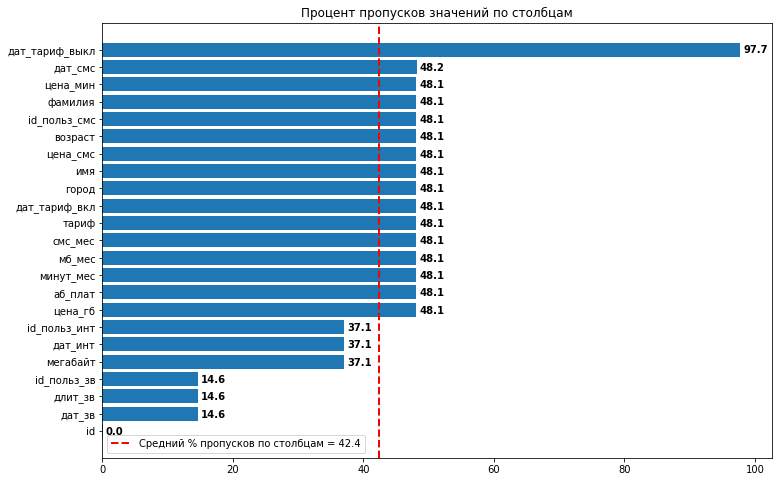

In [256]:
columns = df_rus.columns.values.tolist()
nan = []
for col in columns:
    not_nan_count = df_rus[col].count()
    percent = ((len(df_rus) - not_nan_count) / len(df_rus)) * 100
    nan.append(percent)
nan_percent_before = pd.Series(nan,
                               index = columns)
nan_percent_before_mean = nan_percent_before.mean()
nan_percent_before.sort_values(ascending=True,
                               inplace=True)
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(nan_percent_before.index, nan_percent_before.values)
ax.set_title('Процент пропусков значений по столбцам')
# Добавим на график цифры значений
for i in ax.patches:
    plt.text(i.get_width()+0.5,
    i.get_y()+0.2, str(round(i.get_width(),1)),
    fontsize=10, fontweight='bold', color='black')
# Построим линию, показывающую средний % пропусков по столбцам
plt.axvline(
    x=nan_percent_before_mean, linewidth=2,
    label='Средний % пропусков по столбцам = {}'.format(round(nan_percent_before_mean, 1)),
    color='r', linestyle='--')
plt.legend()
plt.show()

Разброс параметров и очевидные аномалии оценим в следующем разделе.

Посмотрим корреляцию значений столбцов друг с другом. Может пригодится при заполнении пропусков.

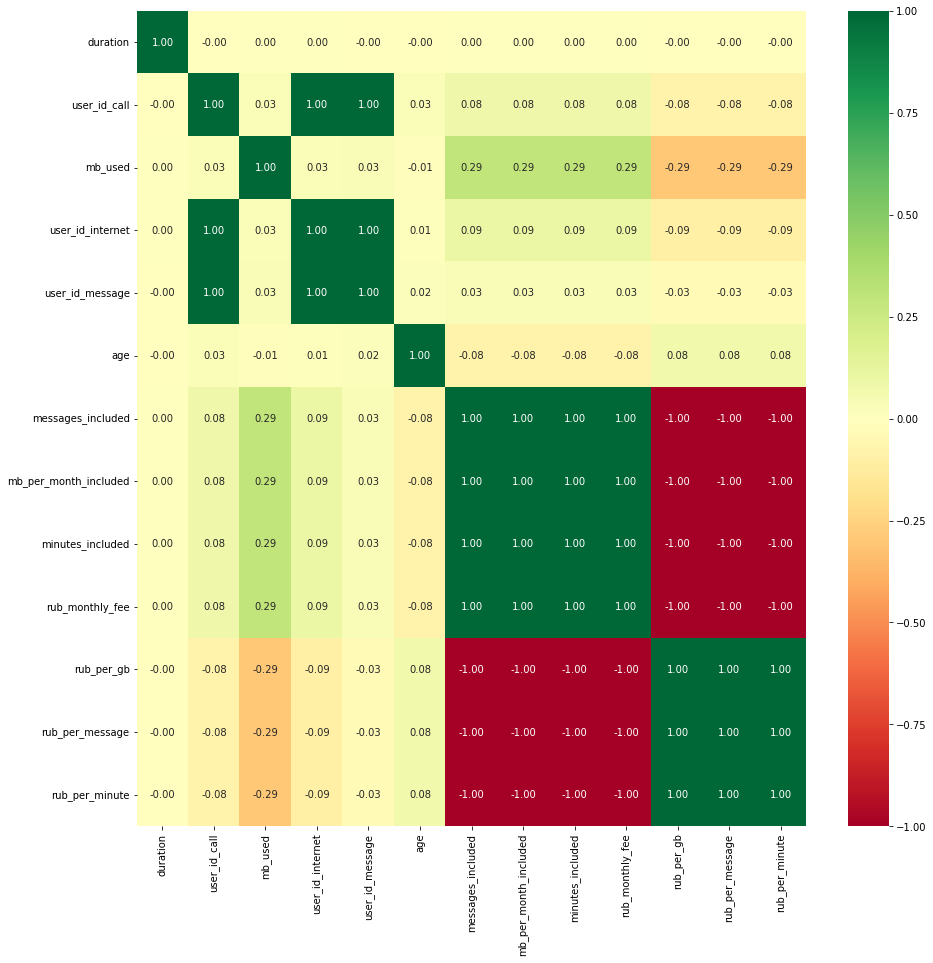

In [257]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            cmap='RdYlGn',
            fmt='.2f')
plt.show()

### Аномалии, ошибки

#### id:

In [258]:
display('Значения id:', df['id'].sort_values().unique())

'Значения id:'

array(['1000_0', '1000_1', '1000_10', ..., '1499_98', '1499_99', nan],
      dtype=object)

Пригодится если чего надумаю дозаполнить.

In [259]:
print('\nКоличество значений в df:', df['id'].count())
print('Количество значений в calls:', calls['id'].count())
print('Количество значений в internet:', internet['id'].count())
print('Количество значений в messages:', messages['id'].count())


Количество значений в df: 237279
Количество значений в calls: 202607
Количество значений в internet: 149396
Количество значений в messages: 123036


#### дат_зв:

In [260]:
display('Значения call_date:', df['call_date'].sort_values().unique())

'Значения call_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

Проверяем потеряшек при объединении.

In [261]:
print('\nКоличество значений в df:', df['call_date'].count())
print('Количество значений в calls:', calls['call_date'].count())


Количество значений в df: 202607
Количество значений в calls: 202607


Потерь нет.

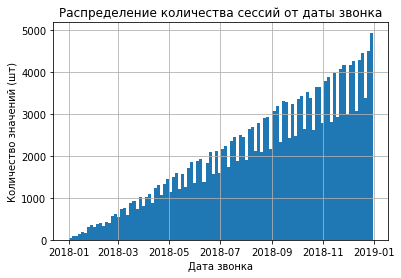

In [262]:
display(df['call_date'].hist(bins=100))
plt.title("Распределение количества сессий от даты звонка")
plt.xlabel("Дата звонка")
plt.ylabel("Количество значений (шт)")
plt.show()

#### длит_зв:

'Значения duration:'

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.735e+01, 3.800e+01,
             nan])


Количество значений в df: 202607
Количество значений в calls: 202607



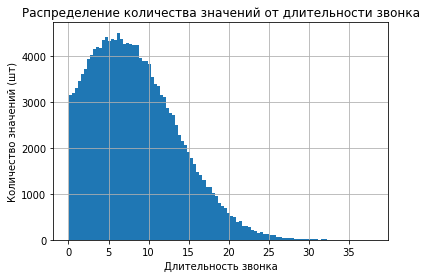

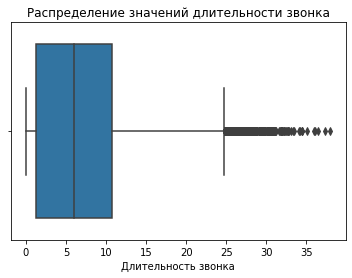

In [263]:
display('Значения duration:', df['duration'].sort_values().unique())
print('\nКоличество значений в df:', df['duration'].count())
print('Количество значений в calls:', calls['duration'].count())
print()
display(df['duration'].hist(bins=100,
                            range = (1.000e-02, 3.800e+01))) # многовато пропущенных звонков
plt.title("Распределение количества значений от длительности звонка")
plt.xlabel("Длительность звонка")
plt.ylabel("Количество значений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'duration',
                         orient = 'h'))
plt.title("Распределение значений длительности звонка")
plt.xlabel("Длительность звонка")
plt.show()

#### id_польз_зв:

'Значения user_id_call:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1092., 1093., 1094., 1095., 1096., 1097., 1098., 1099.,
       1100., 1101., 1102., 1103., 1104., 1105., 1107., 1108., 1109.,
       1110., 1111., 1112., 1113., 1114., 1115., 1116., 1117., 1118.,
       1119., 1120., 1121., 1122., 1123., 1124., 1125., 1126., 1127.,
       1129., 1130.,


Количество значений в df: 202607
Количество значений в calls: 202607



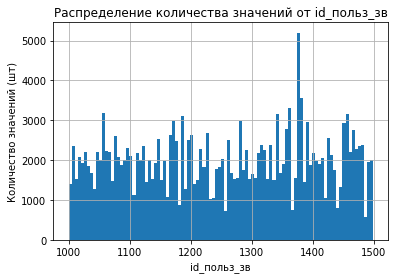

In [264]:
display('Значения user_id_call:', df['user_id_call'].sort_values().unique())
print('\nКоличество значений в df:', df['user_id_call'].count())
print('Количество значений в calls:', calls['user_id'].count())
print()
display(df['user_id_call'].hist(bins=100))
plt.title("Распределение количества значений от id_польз_зв")
plt.xlabel("id_польз_зв")
plt.ylabel("Количество значений (шт)")
plt.show()

#### мегабайт:

'Значения mb_used:'

array([0.00000e+00, 3.00000e-02, 4.00000e-02, ..., 1.70275e+03,
       1.72483e+03,         nan])


Количество значений в df: 149396
Количество значений в internet: 149396



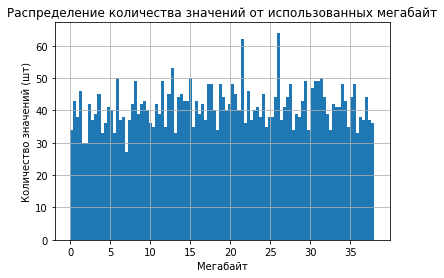

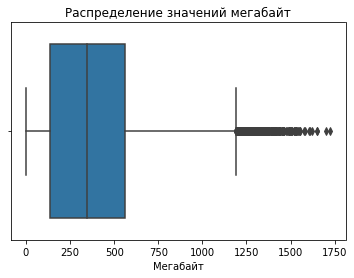

In [265]:
display('Значения mb_used:', df['mb_used'].sort_values().unique())
print('\nКоличество значений в df:', df['mb_used'].count())
print('Количество значений в internet:', internet['mb_used'].count())
print()
display(df['mb_used'].hist(bins=100,
                           range = (1.000e-02, 3.800e+01))) # многовато нулевых значений
plt.title("Распределение количества значений от использованных мегабайт")
plt.xlabel("Мегабайт")
plt.ylabel("Количество значений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'mb_used',
                         orient = 'h'))
plt.title("Распределение значений мегабайт")
plt.xlabel("Мегабайт")
plt.show()

#### дат_инт:

'Значения session_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28


Количество значений в df: 149396
Количество значений в internet: 149396



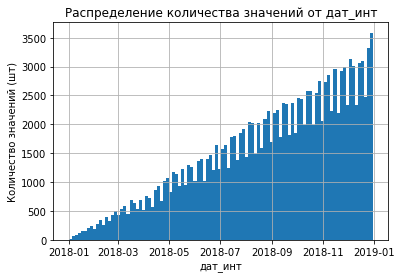

In [266]:
display('Значения session_date:', df['session_date'].sort_values().unique())
print('\nКоличество значений в df:', df['session_date'].count())
print('Количество значений в internet:', internet['session_date'].count())
print()
display(df['session_date'].hist(bins=100))
plt.title("Распределение количества значений от дат_инт")
plt.xlabel("дат_инт")
plt.ylabel("Количество значений (шт)")
plt.show()

#### id_польз_инт:

'Значения user_id_internet:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1091., 1092., 1093., 1094., 1095., 1096., 1097., 1098.,
       1099., 1100., 1101., 1102., 1103., 1104., 1105., 1106., 1107.,
       1108., 1109., 1110., 1111., 1112., 1113., 1114., 1115., 1116.,
       1117., 1118., 1119., 1120., 1121., 1122., 1123., 1124., 1125.,
       1126., 1127.,


Количество значений в df: 149396
Количество значений в internet: 149396



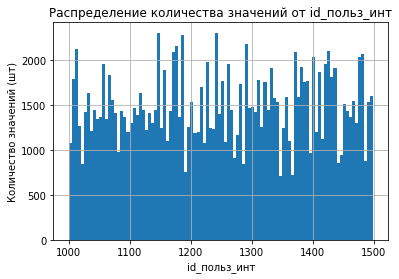

In [267]:
display('Значения user_id_internet:', df['user_id_internet'].sort_values().unique())
print('\nКоличество значений в df:', df['user_id_internet'].count())
print('Количество значений в internet:', internet['user_id'].count())
print()
display(df['user_id_internet'].hist(bins=100))
plt.title("Распределение количества значений от id_польз_инт")
plt.xlabel("id_польз_инт")
plt.ylabel("Количество значений (шт)")
plt.show()

#### дат_смс:

'Значения message_date:'

array(['2018-01-02T00:00:00.000000000', '2018-01-03T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-07T00:00:00.000000000',
       '2018-01-08T00:00:00.000000000', '2018-01-09T00:00:00.000000000',
       '2018-01-10T00:00:00.000000000', '2018-01-11T00:00:00.000000000',
       '2018-01-12T00:00:00.000000000', '2018-01-13T00:00:00.000000000',
       '2018-01-14T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-20T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-22T00:00:00.000000000', '2018-01-23T00:00:00.000000000',
       '2018-01-24T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-01-26T00:00:00.000000000', '2018-01-27T00:00:00.000000000',
       '2018-01-28T00:00:00.000000000', '2018-01-29


Количество значений в df: 123036
Количество значений в messages: 123036



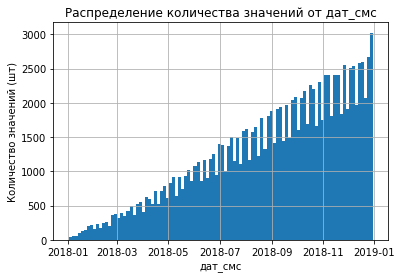

In [268]:
display('Значения message_date:', df['message_date'].sort_values().unique())
print('\nКоличество значений в df:', df['message_date'].count())
print('Количество значений в messages:', messages['message_date'].count())
print()
display(df['message_date'].hist(bins=100))
plt.title("Распределение количества значений от дат_смс")
plt.xlabel("дат_смс")
plt.ylabel("Количество значений (шт)")
plt.show()

#### id_польз_смс:

'Значения user_id_message:'

array([1000., 1001., 1002., 1003., 1004., 1005., 1006., 1007., 1008.,
       1009., 1010., 1011., 1012., 1013., 1014., 1015., 1016., 1017.,
       1018., 1019., 1020., 1021., 1022., 1023., 1024., 1025., 1026.,
       1027., 1028., 1029., 1030., 1031., 1032., 1033., 1034., 1035.,
       1036., 1037., 1038., 1039., 1040., 1041., 1042., 1043., 1044.,
       1045., 1046., 1047., 1048., 1049., 1050., 1051., 1052., 1053.,
       1054., 1055., 1056., 1057., 1058., 1059., 1060., 1061., 1062.,
       1063., 1064., 1065., 1066., 1067., 1068., 1069., 1070., 1071.,
       1072., 1073., 1074., 1075., 1076., 1077., 1078., 1079., 1080.,
       1081., 1082., 1083., 1084., 1085., 1086., 1087., 1088., 1089.,
       1090., 1091., 1092., 1093., 1094., 1095., 1096., 1097., 1098.,
       1099., 1100., 1101., 1102., 1103., 1104., 1105., 1106., 1107.,
       1108., 1109., 1110., 1111., 1112., 1113., 1114., 1115., 1116.,
       1117., 1118., 1119., 1120., 1121., 1122., 1123., 1124., 1125.,
       1126., 1127.,


Количество значений в df: 123110
Количество значений в messages: 123036



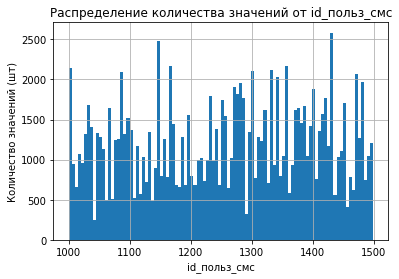

In [269]:
display('Значения user_id_message:', df['user_id_message'].sort_values().unique())
print('\nКоличество значений в df:', df['user_id_message'].count())
print('Количество значений в messages:', messages['user_id'].count())
print()
display(df['user_id_message'].hist(bins=100))
plt.title("Распределение количества значений от id_польз_смс")
plt.xlabel("id_польз_смс")
plt.ylabel("Количество значений (шт)")
plt.show()

#### возраст:

'Значения возраста:'

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., nan])


Количество значений в df: 123110
Количество значений в users: 500



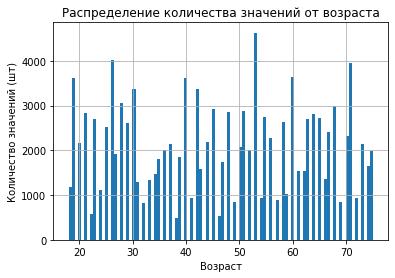

In [270]:
display('Значения возраста:', df['age'].sort_values().unique())
print('\nКоличество значений в df:', df['age'].count())
print('Количество значений в users:', users['age'].count())
print()
display(df['age'].hist(bins=100))
plt.title("Распределение количества значений от возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество значений (шт)")
plt.show()

#### город:

In [271]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['city']
                      .sort_values()
                      .unique()
                      ).to_frame()
                       .rename(columns={0 : 'город'}))
print('\nКоличество значений в df:', df['city'].count())
print('Количество значений в users:', users['city'].count())

,город
0,Архангельск
1,Астрахань
2,Балашиха
3,Барнаул
4,Белгород
5,Брянск
6,Владивосток
7,Владикавказ
8,Владимир
9,Волгоград



Количество значений в df: 123110
Количество значений в users: 500


#### имя:

Рустэм, нет такого имени (а вот вариант Рустам имеется).

In [272]:
df['first_name'] = df['first_name'].str.replace('Рустэм','Рустем')

In [273]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['first_name']
                      .sort_values()
                      .unique()
                      ).to_frame()
                       .rename(columns={0 : 'имя'}))

print('\nКоличество значений в df:', df['first_name'].count())
print('Количество значений в users:', users['first_name'].count())

,имя
0,Авксентий
1,Агата
2,Агафья
3,Агнесса
4,Адам
5,Аким
6,Аксён
7,Алан
8,Алевтина
9,Александр



Количество значений в df: 123110
Количество значений в users: 500


#### фамилия:

In [274]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(df['last_name']
                      .sort_values()
                      .unique()
                      ).to_frame()
                       .rename(columns={0 : 'фамилия'}))
print('\nКоличество значений в df:', df['last_name'].count())
print('Количество значений в users:', users['last_name'].count())

,фамилия
0,Ёлчина
1,Ёркин
2,Ёркина
3,Ёрохов
4,Ёрохова
5,Абаимов
6,Абакумов
7,Абакшина
8,Абалакова
9,Абалдуева



Количество значений в df: 123110
Количество значений в users: 500


#### дат_тариф_вкл:

'Значения reg_date:'

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000',
       '2018-01-06T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-15T00:00:00.000000000',
       '2018-01-16T00:00:00.000000000', '2018-01-17T00:00:00.000000000',
       '2018-01-18T00:00:00.000000000', '2018-01-19T00:00:00.000000000',
       '2018-01-20T00:00:00.000000000', '2018-01-21T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-29T00:00:00.000000000',
       '2018-01-30T00:00:00.000000000', '2018-02-02T00:00:00.000000000',
       '2018-02-03T00:00:00.000000000', '2018-02-04T00:00:00.000000000',
       '2018-02-05T00:00:00.000000000', '2018-02-06


Количество значений в df: 123110
Количество значений в users: 500



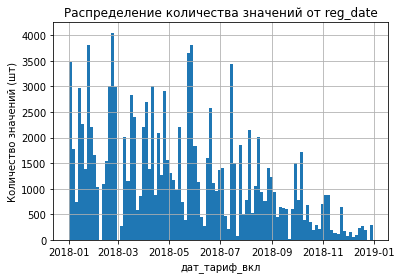

In [275]:
display('Значения reg_date:', df['reg_date'].sort_values().unique())
print('\nКоличество значений в df:', df['reg_date'].count())
print('Количество значений в users:', users['reg_date'].count())
print()
display(df['reg_date'].hist(bins=100))
plt.title("Распределение количества значений от reg_date")
plt.xlabel("дат_тариф_вкл")
plt.ylabel("Количество значений (шт)")
plt.show()

#### дат_тариф_выкл:

'Значения churn_date:'

array(['2018-08-17T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-09-02T00:00:00.000000000', '2018-09-26T00:00:00.000000000',
       '2018-09-27T00:00:00.000000000', '2018-10-03T00:00:00.000000000',
       '2018-10-04T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-10-14T00:00:00.000000000', '2018-10-25T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-10-28T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-11-13T00:00:00.000000000',
       '2018-11-16T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-11-22T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-09T00:00:00.000000000',
       '2018-12-11T00:00:00.000000000', '2018-12-14T00:00:00.000000000',
       '2018-12-16T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-12-21


Количество значений в df: 5348
Количество значений в users: 38



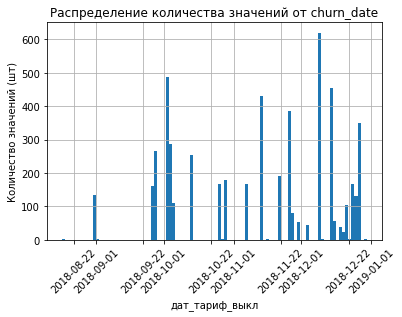

In [276]:
display('Значения churn_date:', df['churn_date'].sort_values().unique())
print('\nКоличество значений в df:', df['churn_date'].count())
print('Количество значений в users:', users['churn_date'].count())
print()
display(df['churn_date'].hist(bins=100))
plt.title("Распределение количества значений от churn_date")
plt.xlabel("дат_тариф_выкл")
plt.xticks(rotation = 45)
plt.ylabel("Количество значений (шт)")
plt.show()

#### тариф:

'Значения tariff:'

array(['smart', 'ultra', nan], dtype=object)


Количество значений в df: 123110
Количество значений в users: 500
Количество значений в tariffs: 2



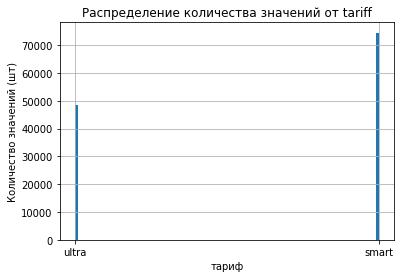

In [277]:
display('Значения tariff:', df['tariff'].sort_values().unique())
print('\nКоличество значений в df:', df['tariff'].count())
print('Количество значений в users:', users['tariff'].count())
print('Количество значений в tariffs:', tariffs['tariff'].count())
print()
display(df['tariff'].hist(bins=100))
plt.title("Распределение количества значений от tariff")
plt.xlabel("тариф")
plt.ylabel("Количество значений (шт)")
plt.show()

#### смс_мес:

'\nЗначения messages_included:'

array([  50., 1000.,   nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



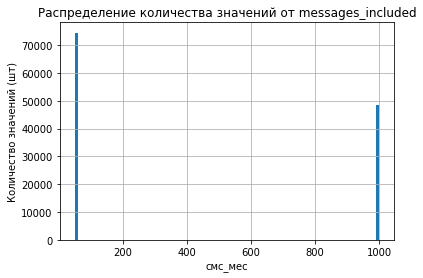

In [278]:
display('\nЗначения messages_included:', df['messages_included'].sort_values().unique())
print('\nКоличество значений в df:', df['messages_included'].count())
print('Количество значений в tariffs:', tariffs['messages_included'].count())
print()
display(df['messages_included'].hist(bins=100))
plt.title("Распределение количества значений от messages_included")
plt.xlabel("смс_мес")
plt.ylabel("Количество значений (шт)")
plt.show()

#### мб_мес:

'Значения mb_per_month_included:'

array([15360., 30720.,    nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



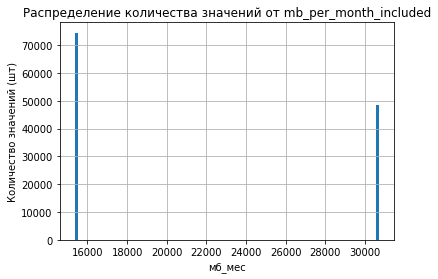

In [279]:
display('Значения mb_per_month_included:', df['mb_per_month_included'].sort_values().unique())
print('\nКоличество значений в df:', df['mb_per_month_included'].count())
print('Количество значений в tariffs:', tariffs['mb_per_month_included'].count())
print()
display(df['mb_per_month_included'].hist(bins=100))
plt.title("Распределение количества значений от mb_per_month_included")
plt.xlabel("мб_мес")
plt.ylabel("Количество значений (шт)")
plt.show()

#### минут_мес:

'Значения minutes_included:'

array([ 500., 3000.,   nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



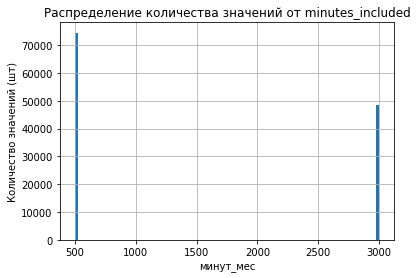

In [280]:
display('Значения minutes_included:', df['minutes_included'].sort_values().unique())
print('\nКоличество значений в df:', df['minutes_included'].count())
print('Количество значений в tariffs:', tariffs['minutes_included'].count())
print()
display(df['minutes_included'].hist(bins=100))
plt.title("Распределение количества значений от minutes_included")
plt.xlabel("минут_мес")
plt.ylabel("Количество значений (шт)")
plt.show()

#### аб_плат:

'Значения rub_monthly_fee:'

array([ 550., 1950.,   nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



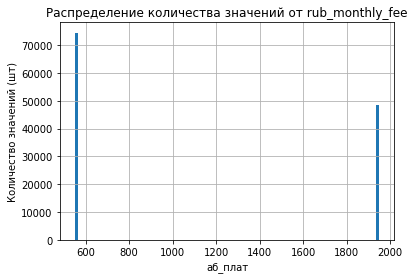

In [281]:
display('Значения rub_monthly_fee:', df['rub_monthly_fee'].sort_values().unique())
print('\nКоличество значений в df:', df['rub_monthly_fee'].count())
print('Количество значений в tariffs:', tariffs['rub_monthly_fee'].count())
print()
display(df['rub_monthly_fee'].hist(bins=100))
plt.title("Распределение количества значений от rub_monthly_fee")
plt.xlabel("аб_плат")
plt.ylabel("Количество значений (шт)")
plt.show()

#### цена_гб:

'Значения rub_per_gb:'

array([150., 200.,  nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



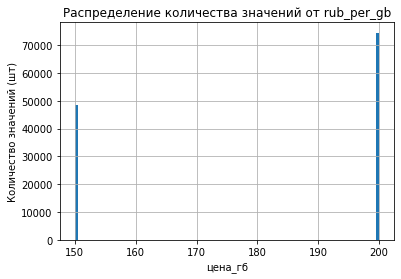

In [282]:
display('Значения rub_per_gb:', df['rub_per_gb'].sort_values().unique())
print('\nКоличество значений в df:', df['rub_per_gb'].count())
print('Количество значений в tariffs:', tariffs['rub_per_gb'].count())
print()
display(df['rub_per_gb'].hist(bins=100))
plt.title("Распределение количества значений от rub_per_gb")
plt.xlabel("цена_гб")
plt.ylabel("Количество значений (шт)")
plt.show()

#### цена_смс:

'Значения rub_per_message:'

array([ 1.,  3., nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



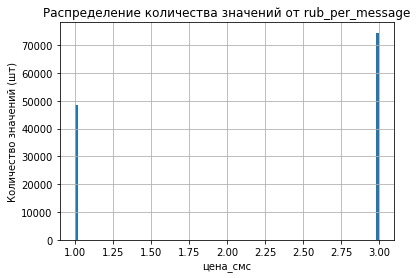

In [283]:
display('Значения rub_per_message:', df['rub_per_message'].sort_values().unique())
print('\nКоличество значений в df:', df['rub_per_message'].count())
print('Количество значений в tariffs:', tariffs['rub_per_message'].count())
print()
display(df['rub_per_message'].hist(bins=100))
plt.title("Распределение количества значений от rub_per_message")
plt.xlabel("цена_смс")
plt.ylabel("Количество значений (шт)")
plt.show()

#### цена_мин:

'Значения rub_per_minute:'

array([ 1.,  3., nan])


Количество значений в df: 123110
Количество значений в tariffs: 2



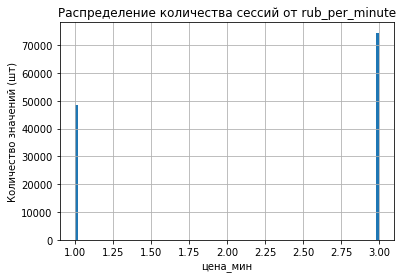

In [284]:
display('Значения rub_per_minute:', df['rub_per_minute'].sort_values().unique())
print('\nКоличество значений в df:', df['rub_per_minute'].count())
print('Количество значений в tariffs:', tariffs['rub_per_minute'].count())
print()
display(df['rub_per_minute'].hist(bins=100))
plt.title("Распределение количества сессий от rub_per_minute")
plt.xlabel("цена_мин")
plt.ylabel("Количество значений (шт)")
plt.show()

##### Вывод:

    - Аномалий не обнаружено.
      Непонятная ошибка в имени "Рустэм" не считается.
    - При объединении ничего не потерялось.

### Дополнительные параметры

Посчитаем для каждого пользователя:

	• количество сделанных звонков и израсходованных минут разговора по месяцам;
	• количество отправленных сообщений по месяцам;
	• объем израсходованного интернет-трафика по месяцам;
	• помесячную выручку с каждого пользователя.


#### Звонки и минуты по месяцам

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам.

In [285]:
df['month'] = df['call_date'].dt.month

Согласно условиям звонки округляются до минут в большую сторону.

In [286]:
df['duration'] = -1 * df['duration']
df['duration'] = df['duration'] // 1
df['duration'] = df['duration'] * -1

Количество минут в месяц получается:

In [287]:
call_min_mon = (df.groupby(['user_id_call', 'month'])['duration']
                  .agg(['count', 'sum'])
                  ).reset_index()
display(call_min_mon)

,user_id_call,month,count,sum
0,"1,000.000",5.000,22,159.000
1,"1,000.000",6.000,43,172.000
2,"1,000.000",7.000,47,340.000
3,"1,000.000",8.000,52,408.000
4,"1,000.000",9.000,58,466.000
...,...,...,...,...
3169,"1,498.000",10.000,41,247.000
3170,"1,499.000",9.000,9,70.000
3171,"1,499.000",10.000,68,449.000
3172,"1,499.000",11.000,74,612.000


#### СМС по месяцам

Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [288]:
df['month'] = df['message_date'].dt.month
mes_mon = (df.groupby(['user_id_message', 'month'])['id']
             .agg('count')
             ).reset_index()
display(mes_mon)

,user_id_message,month,id
0,"1,000.000",5.000,22
1,"1,000.000",6.000,60
2,"1,000.000",7.000,75
3,"1,000.000",8.000,81
4,"1,000.000",9.000,57
...,...,...,...
2712,"1,498.000",10.000,42
2713,"1,499.000",9.000,11
2714,"1,499.000",10.000,48
2715,"1,499.000",11.000,59


#### Трафик по месяцам

Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [289]:
df['month'] = df['session_date'].dt.month
mb_mon = (df.groupby(['user_id_internet', 'month'])['mb_used']
            .agg(['count', 'sum'])
            ).reset_index()

Трафик округляем до гигабайт в большую сторону не так как минуты.

In [290]:
mb_mon['sum'] = mb_mon['sum'] / 1024
mb_mon['sum'] = np.ceil(mb_mon['sum'])
display(mb_mon)

,user_id_internet,month,count,sum
0,"1,000.000",5.000,5,3.000
1,"1,000.000",6.000,49,23.000
2,"1,000.000",7.000,29,14.000
3,"1,000.000",8.000,29,14.000
4,"1,000.000",9.000,27,15.000
...,...,...,...,...
3198,"1,498.000",10.000,59,21.000
3199,"1,499.000",9.000,5,2.000
3200,"1,499.000",10.000,58,18.000
3201,"1,499.000",11.000,49,18.000


#### Выручка с пользователя

Посчитаем для каждого пользователя помесячную выручку с каждого пользователя. Для этого

    - вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
    - остаток умножим на значение из тарифного плана;
    - прибавим абонентскую плату, соответствующую тарифному плану.

Объединяем таблички созданные в "Дополнительные параметры".

In [291]:
# Убираем ругательства Python:
pd.options.mode.chained_assignment = None  # default='warn'

# Делаем общий столбец `user_id` в трех таблицах
call_min_mon = call_min_mon.rename(columns={'user_id_call': 'user_id'})
mes_mon = mes_mon.rename(columns={'user_id_message': 'user_id'})
mb_mon = mb_mon.rename(columns={'user_id_internet': 'user_id'})

# Склеиваем три таблички
revenue = call_min_mon.merge(mes_mon,
                             on=['user_id','month'],
                             how='outer').merge(mb_mon,
                                                on=['user_id','month'],
                                                how='outer')

# Более информативные названия колонок
revenue = revenue.rename(columns={'count_x': 'count_call',
                                  'sum_x': 'sum_call',
                                  'id': 'sum_id_mes',
                                  'count_y': 'count_int',
                                  'sum_y': 'sum_int'
                                 })
display(revenue)

,user_id,month,count_call,sum_call,sum_id_mes,count_int,sum_int
0,"1,000.000",5.000,22.000,159.000,22.000,5.000,3.000
1,"1,000.000",6.000,43.000,172.000,60.000,49.000,23.000
2,"1,000.000",7.000,47.000,340.000,75.000,29.000,14.000
3,"1,000.000",8.000,52.000,408.000,81.000,29.000,14.000
4,"1,000.000",9.000,58.000,466.000,57.000,27.000,15.000
...,...,...,...,...,...,...,...
3209,"1,489.000",9.000,NaN,NaN,32.000,63.000,17.000
3210,"1,489.000",10.000,NaN,NaN,21.000,63.000,20.000
3211,"1,489.000",11.000,NaN,NaN,20.000,55.000,18.000
3212,"1,489.000",12.000,NaN,NaN,35.000,51.000,17.000


Добавляем столбец tariff.

In [292]:
revenue = revenue.assign(tariff = revenue.user_id)
for user_id in revenue['user_id']:
    tar = users[(users['user_id'] == user_id)]['tariff'].min()
    revenue['tariff'].where(~(revenue.tariff == user_id),
                            other=tar,
                            inplace=True)

В таблице tariffs столбец tariff переводим в индекс.

In [293]:
tariffs = tariffs.set_index('tariff')

Вычтитаем бесплатный лимит из суммарного количества звонков.

и

Вычисляем надбавки к аббонентской плате.

In [294]:
%%time
# Убираем ругательства Python:
pd.options.mode.chained_assignment = None  # default='warn'

for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','dur_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_call'] - tariffs.loc['smart', 'minutes_included']
    revenue.loc[revenue['tariff'] == 'ultra','dur_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_call'] - tariffs.loc['ultra', 'minutes_included']
    revenue.loc[revenue['tariff'] == 'smart','rev_call'] = revenue.loc[revenue['tariff'] == 'smart', 'dur_smart'] * tariffs.loc['smart', 'rub_per_minute']
    revenue.loc[revenue['tariff'] == 'ultra','rev_call'] = revenue.loc[revenue['tariff'] == 'ultra', 'dur_ultra'] * tariffs.loc['ultra', 'rub_per_minute']

#display(revenue)
#display('dur_smart:', revenue['dur_smart'].sort_values().unique())
#display('dur_ultra:', revenue['dur_ultra'].sort_values().unique())
display('Значения rev_call:', revenue['rev_call'].sort_values().unique())
print()

'Значения rev_call:'

array([-3000., -2999., -2995., ...,  1932.,  2805.,    nan])


CPU times: user 20.8 s, sys: 80.8 ms, total: 20.9 s
Wall time: 20.9 s


Вычтитаем бесплатный лимит из суммарного количества сообщений.

Вычисляем надбавки к аббонентской плате.

In [295]:
%%time
for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','sms_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_id_mes'] - tariffs.loc['smart', 'messages_included']
    revenue.loc[revenue['tariff'] == 'ultra','sms_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_id_mes'] - tariffs.loc['ultra', 'messages_included']
    revenue.loc[revenue['tariff'] == 'smart','rev_mes'] = revenue.loc[revenue['tariff'] == 'smart', 'sms_smart'] * tariffs.loc['smart', 'rub_per_message']
    revenue.loc[revenue['tariff'] == 'ultra','rev_mes'] = revenue.loc[revenue['tariff'] == 'ultra', 'sms_ultra'] * tariffs.loc['ultra', 'rub_per_message']

#display(revenue)
#display('sms_smart:', revenue['sms_smart'].sort_values().unique())
#display('sms_ultra:', revenue['sms_ultra'].sort_values().unique())
display('rev_mes:', revenue['rev_mes'].sort_values().unique())
print()

'rev_mes:'

array([-999., -998., -997., -996., -995., -994., -993., -992., -991.,
       -990., -989., -988., -987., -986., -985., -984., -983., -982.,
       -981., -980., -979., -978., -977., -976., -975., -974., -973.,
       -972., -971., -970., -969., -968., -967., -966., -965., -964.,
       -963., -962., -961., -960., -959., -958., -957., -956., -955.,
       -954., -953., -952., -951., -950., -949., -948., -947., -946.,
       -945., -944., -943., -942., -941., -940., -939., -938., -937.,
       -936., -935., -934., -933., -932., -931., -930., -929., -928.,
       -927., -926., -925., -924., -923., -922., -921., -920., -919.,
       -918., -917., -916., -915., -914., -913., -912., -911., -910.,
       -909., -908., -907., -906., -905., -904., -903., -902., -901.,
       -900., -899., -898., -897., -896., -895., -894., -893., -892.,
       -891., -889., -888., -887., -886., -885., -884., -883., -882.,
       -881., -880., -879., -878., -877., -876., -874., -873., -872.,
       -871., -870.,


CPU times: user 20.6 s, sys: 81.3 ms, total: 20.7 s
Wall time: 20.6 s


Вычтитаем бесплатный лимит из суммарного количества интернет-трафика.

Вычисляем надбавки к аббонентской плате.

In [213]:
%%time
for user_id in revenue['user_id']:
    revenue.loc[revenue['tariff'] == 'smart','mb_smart'] = revenue.loc[revenue['tariff'] == 'smart', 'sum_int'] - tariffs.loc['smart', 'mb_per_month_included']/1024
    revenue.loc[revenue['tariff'] == 'ultra','mb_ultra'] = revenue.loc[revenue['tariff'] == 'ultra', 'sum_int'] - tariffs.loc['ultra', 'mb_per_month_included']/1024
    revenue.loc[revenue['tariff'] == 'smart','rev_int'] = revenue.loc[revenue['tariff'] == 'smart', 'mb_smart'] * tariffs.loc['smart', 'rub_per_gb']
    revenue.loc[revenue['tariff'] == 'ultra','rev_int'] = revenue.loc[revenue['tariff'] == 'ultra', 'mb_ultra'] * tariffs.loc['ultra', 'rub_per_gb']
    
#display(revenue)
#display('sms_smart:', revenue['mb_smart'].sort_values().unique())
#display('sms_ultra:', revenue['mb_ultra'].sort_values().unique())
display('rev_mes:', revenue['rev_int'].sort_values().unique())
print()

'rev_mes:'

array([-4500., -4350., -4200., -4050., -3900., -3750., -3600., -3450.,
       -3300., -3150., -3000., -2850., -2800., -2700., -2600., -2550.,
       -2400., -2250., -2200., -2100., -2000., -1950., -1800., -1650.,
       -1600., -1500., -1400., -1350., -1200., -1050., -1000.,  -900.,
        -800.,  -750.,  -600.,  -450.,  -400.,  -300.,  -200.,  -150.,
           0.,   150.,   200.,   300.,   400.,   450.,   600.,   750.,
         800.,   900.,  1000.,  1050.,  1200.,  1350.,  1400.,  1500.,
        1600.,  1650.,  1800.,  1950.,  2000.,  2100.,  2200.,  2250.,
        2400.,  2600.,  2700.,  2800.,  2850.,  3000.,  3200.,  3400.,
        3800.,  4000.,  4200.,  4400.,  4600.,    nan])


CPU times: user 20.6 s, sys: 75.7 ms, total: 20.7 s
Wall time: 20.7 s


Убираем значения меньше "0". Оператор все-равно не компенсирует.

In [214]:
for user_id in revenue['user_id']:
    revenue.loc[(revenue['rev_call'] < 0), 'rev_call'] = 0
    revenue.loc[(revenue['rev_mes'] < 0), 'rev_mes'] = 0
    revenue.loc[(revenue['rev_int'] < 0), 'rev_int'] = 0

Убираем значения "nan".

In [215]:
revenue ['rev_call'] = revenue ['rev_call'].fillna(0)
revenue ['rev_mes'] = revenue ['rev_mes'].fillna(0)
revenue['rev_int'] = revenue['rev_int'].fillna(0)
print()
display('Значения rev_call:', revenue['rev_call'].sort_values().unique())
print()
display('Значения rev_mes:', revenue['rev_mes'].sort_values().unique())
print()
display('Значения rev_int:', revenue['rev_int'].sort_values().unique())

'Значения rev_call:'

array([   0.,    3.,    6.,    9.,   12.,   15.,   18.,   21.,   24.,
         27.,   30.,   33.,   36.,   39.,   42.,   45.,   48.,   51.,
         54.,   57.,   60.,   63.,   66.,   69.,   72.,   75.,   78.,
         81.,   84.,   87.,   90.,   93.,   96.,   99.,  102.,  105.,
        108.,  111.,  114.,  117.,  120.,  123.,  126.,  129.,  132.,
        135.,  138.,  141.,  144.,  147.,  150.,  153.,  156.,  159.,
        162.,  165.,  168.,  171.,  174.,  177.,  180.,  183.,  186.,
        189.,  192.,  195.,  198.,  201.,  204.,  207.,  210.,  213.,
        216.,  219.,  222.,  225.,  228.,  231.,  234.,  237.,  240.,
        243.,  246.,  249.,  252.,  255.,  258.,  261.,  264.,  267.,
        270.,  273.,  276.,  282.,  285.,  288.,  291.,  294.,  297.,
        300.,  303.,  306.,  309.,  312.,  315.,  318.,  321.,  324.,
        327.,  330.,  333.,  336.,  339.,  342.,  345.,  348.,  351.,
        354.,  357.,  360.,  363.,  366.,  369.,  372.,  375.,  378.,
        381.,  384.,

'Значения rev_mes:'

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
       132., 138., 141., 144., 147., 153., 156., 159., 162., 165., 168.,
       171., 174., 177., 180., 183., 186., 192., 195., 201., 213., 222.,
       225., 231., 237., 252., 258., 261., 267., 279.])

'Значения rev_int:'

array([   0.,  150.,  200.,  300.,  400.,  450.,  600.,  750.,  800.,
        900., 1000., 1050., 1200., 1350., 1400., 1500., 1600., 1650.,
       1800., 1950., 2000., 2100., 2200., 2250., 2400., 2600., 2700.,
       2800., 2850., 3000., 3200., 3400., 3800., 4000., 4200., 4400.,
       4600.])

Ну и финальные циферки: кто, когда и сколько денежек принес.

In [216]:
revenue = revenue.assign(revenue = 0) # добавляем столбец
for i in range(len(revenue ['user_id'])):
    if revenue ['tariff'][i] == 'smart':
        revenue['revenue'][i] += revenue['rev_call'][i] + revenue['rev_mes'][i] + revenue['rev_int'][i] + 550
    elif revenue ['tariff'][i] == 'ultra':
        revenue['revenue'][i] += revenue['rev_call'][i] + revenue['rev_mes'][i] + revenue['rev_int'][i] + 1950
    else:
        revenue['revenue'][i] += 0
print()
display(revenue)
print()
display('Значения revenue:', revenue['revenue'].sort_values().unique())

,user_id,month,count_call,sum_call,sum_id_mes,count_int,sum_int,tariff,dur_smart,dur_ultra,rev_call,sms_smart,sms_ultra,rev_mes,mb_smart,mb_ultra,rev_int,revenue
0,"1,000.000",5.000,22.000,159.000,22.000,5.000,3.000,ultra,NaN,"-2,841.000",0.000,NaN,-978.000,0.000,NaN,-27.000,0.000,1950
1,"1,000.000",6.000,43.000,172.000,60.000,49.000,23.000,ultra,NaN,"-2,828.000",0.000,NaN,-940.000,0.000,NaN,-7.000,0.000,1950
2,"1,000.000",7.000,47.000,340.000,75.000,29.000,14.000,ultra,NaN,"-2,660.000",0.000,NaN,-925.000,0.000,NaN,-16.000,0.000,1950
3,"1,000.000",8.000,52.000,408.000,81.000,29.000,14.000,ultra,NaN,"-2,592.000",0.000,NaN,-919.000,0.000,NaN,-16.000,0.000,1950
4,"1,000.000",9.000,58.000,466.000,57.000,27.000,15.000,ultra,NaN,"-2,534.000",0.000,NaN,-943.000,0.000,NaN,-15.000,0.000,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,"1,489.000",9.000,NaN,NaN,32.000,63.000,17.000,smart,NaN,NaN,0.000,-18.000,NaN,0.000,2.000,NaN,400.000,950
3210,"1,489.000",10.000,NaN,NaN,21.000,63.000,20.000,smart,NaN,NaN,0.000,-29.000,NaN,0.000,5.000,NaN,"1,000.000",1550
3211,"1,489.000",11.000,NaN,NaN,20.000,55.000,18.000,smart,NaN,NaN,0.000,-30.000,NaN,0.000,3.000,NaN,600.000,1150
3212,"1,489.000",12.000,NaN,NaN,35.000,51.000,17.000,smart,NaN,NaN,0.000,-15.000,NaN,0.000,2.000,NaN,400.000,950


'Значения revenue:'

array([ 550,  553,  556,  559,  562,  565,  568,  571,  574,  577,  580,
        583,  586,  589,  592,  595,  598,  601,  604,  607,  610,  613,
        616,  619,  622,  625,  628,  631,  634,  637,  640,  643,  646,
        649,  652,  655,  658,  661,  664,  670,  673,  676,  679,  682,
        685,  688,  691,  694,  697,  700,  703,  706,  712,  715,  718,
        721,  724,  727,  730,  733,  736,  739,  742,  745,  750,  751,
        753,  756,  762,  763,  765,  766,  769,  772,  775,  777,  778,
        780,  781,  783,  784,  786,  787,  792,  798,  799,  802,  804,
        807,  808,  810,  816,  819,  823,  826,  828,  829,  831,  834,
        835,  837,  838,  840,  841,  844,  847,  849,  850,  858,  859,
        862,  867,  868,  870,  871,  873,  874,  877,  882,  883,  886,
        888,  889,  891,  900,  901,  907,  909,  910,  912,  916,  918,
        919,  922,  924,  925,  927,  928,  934,  942,  948,  949,  950,
        953,  955,  956,  958,  959,  962,  963,  9

## Шаг 3. Анализ данных

    Опишем поведение клиентов оператора, исходя из выборки.
    Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого 
    тарифа в месяц? 
    Посчитаем среднее количество, дисперсию и стандартное отклонение.

### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

Фильтруем по тарифам.

In [217]:
call_min_mon_smart = revenue.loc[revenue['tariff'] == 'smart']
call_min_mon_ultra = revenue.query("tariff in 'ultra'")

Выводим информацию не только графиками, но и табличками.

'smart'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,-296.147,-201.310,-109.948,-132.866,-112.638,-101.933,-91.647,-76.731,-69.734,-72.410,-63.352,-20.015


'ultra'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,"-2,571.889","-2,702.875","-2,510.351","-2,524.698","-2,465.750","-2,502.531","-2,435.602","-2,469.388","-2,441.117","-2,418.271","-2,437.636","-2,385.075"


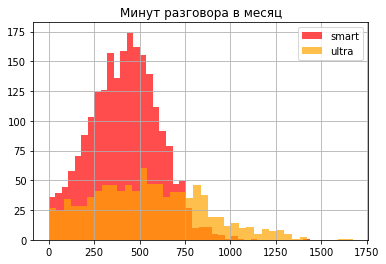

In [218]:
call_min_mon_smart_table = (call_min_mon_smart.groupby('month')['dur_smart']
                                              .agg(['mean']))
call_min_mon_ultra_table = (call_min_mon_ultra.groupby('month')['dur_ultra']
                                              .agg(['mean']))
print()
display('smart', call_min_mon_smart_table.T)
print()
display('ultra', call_min_mon_ultra_table.T)
print()
revenue[revenue['tariff'] == 'smart']['sum_call'].hist(bins=40,
                                                       label='smart',
                                                       color='red',
                                                       alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_call'].hist(bins=40,
                                                       label='ultra',
                                                       color='orange',
                                                       alpha=0.7)
plt.title("Минут разговора в месяц")
plt.legend()

##### Вывод:

    - Оба тарифа избыточны по лимиту минут.
      По табличкам так и вообще получается в среднем на 250 мин. для "smart" и 2600 мин. для "ultra".
    - Тариф на 250 минут могбы привлечь новых клиентов,
      а тариф на 1000-1500 мин. переманил бы часть пользователей smart/
    - Правда многие пользователи перешли бы на более дешевый тариф.
      Имея возможность подуменьшить предоставляемые им возможности.

### Сколько сообщений требуется пользователям каждого тарифа в месяц?

'smart'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,-30.000,-22.060,-14.449,-14.135,-10.967,-11.423,-11.011,-11.250,-10.780,-10.917,-10.119,-7.735


'ultra'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,-956.571,-967.062,-952.200,-955.487,-951.231,-947.687,-937.863,-941.102,-936.705,-930.223,-933.841,-927.991


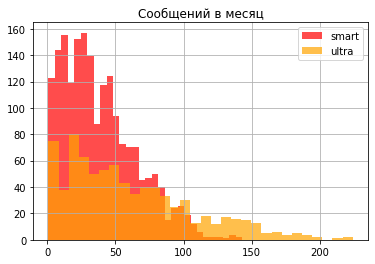

In [219]:
mes_mon_smart = revenue.loc[revenue['tariff'] == 'smart']
mes_mon_smart_table = (mes_mon_smart.groupby('month')['sms_smart']
                                    .agg(['mean']))
mes_mon_ultra = revenue.query("tariff in 'ultra'")
mes_mon_ultra_table = (mes_mon_ultra.groupby('month')['sms_ultra']
                                    .agg(['mean']))
print()
display('smart', mes_mon_smart_table.T)
print()
display('ultra', mes_mon_ultra_table.T)
print()
revenue[revenue['tariff'] == 'smart']['sum_id_mes'].hist(bins=30,
                                                         label='smart',
                                                         color='red',
                                                         alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_id_mes'].hist(bins=30,
                                                         label='ultra',
                                                         color='orange',
                                                         alpha=0.7)
plt.title("Сообщений в месяц")
plt.legend();

##### Вывод:

    - Тариф "smart" по СМС'кам вполне актуальный.
      Несколько избыточный, но не критично. Но пик графика приходится на 25 смс/мес.
    - А вот тариф "ultra" по СМС' сверхизбыточный.
      900 лишних СМС из 1000 - это перебор. Получается уйма ненужных СМС входит в аббонентскую плату.
      Больше 250 не требуется.

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

'smart'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,-30.000,-22.060,-14.449,-14.135,-10.967,-11.423,-11.011,-11.250,-10.780,-10.917,-10.119,-7.735


'ultra'

month,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
mean,-956.571,-967.062,-952.200,-955.487,-951.231,-947.687,-937.863,-941.102,-936.705,-930.223,-933.841,-927.991


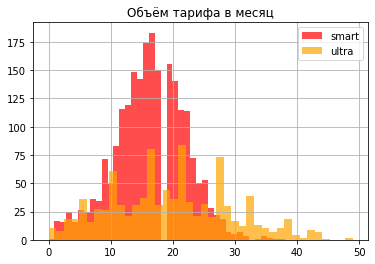

In [220]:
mb_mon_smart = revenue.loc[revenue['tariff'].isin(['smart'])]
mb_mon_ultra = revenue.drop(np.where(revenue['tariff'] == 'ultra')[0])
mb_mon_smart_table = (mb_mon_smart.groupby('month')['mb_smart']
                                  .agg(['mean']))
mb_mon_ultra_table = (mb_mon_ultra.groupby('month')['mb_ultra']
                                  .agg(['mean']))
print()
display('smart', mes_mon_smart_table.T)
print()
display('ultra', mes_mon_ultra_table.T)
print()
revenue[revenue['tariff'] == 'smart']['sum_int'].hist(bins=40,
                                                      label='smart',
                                                      color='red',
                                                      alpha=0.7)
revenue[revenue['tariff'] == 'ultra']['sum_int'].hist(bins=40,
                                                      label='ultra',
                                                      color='orange',
                                                      alpha=0.7)
plt.title("Объём тарифа в месяц")
plt.legend();

##### Вывод:

    - Также как и СМС тариф "smart" по трафику вполне подходящий.
      Даже несколько удачный: пик графика чуть больше 15ГБ, а это дополнительный трафик.
    - А вот тариф "ultra" по трафику почти на 2/3 избыточный.
      В среднем 19 лишних гигабайт из 30.


По минутам:
 - Медиана = 447.0
 - Среднеарифметическое = 456.9316320100819
 - Дисперсия = 56641.03470830063
 - Стандартное отклонение = 237.99377031405805

        call_mean   call_var  call_std
tariff                                
smart     419.060 35,844.190   189.330
ultra     545.450 94,203.420   306.930



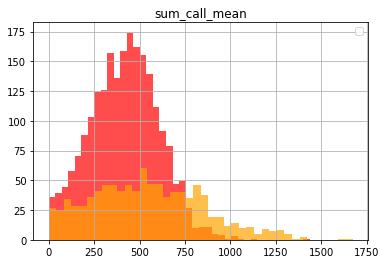

In [221]:
print() 
print('По минутам:') 
print(' - Медиана =', revenue['sum_call'].median()) 
print(' - Среднеарифметическое =', revenue['sum_call'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_call']))
print(' - Стандартное отклонение =', np.std(revenue['sum_call']))
print()
print(revenue.groupby('tariff').agg(call_mean=('sum_call','mean'),
                                    call_var=('sum_call','var'),
                                    call_std=('sum_call', 'std')).round(2))
sum_call_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'],  
                                  aggfunc={"sum_call": [np.mean, np.median]}
                                 ).reset_index()
# Убираем второй этаж в шапке
sum_call_pt.columns = ['_'.join(col).strip() for col in sum_call_pt.columns.values]
sum_call_pt_2 = sum_call_pt.drop(columns=['user_id_', 
                                          'month_'])
print()
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'smart']['sum_call_mean'].hist(bins=40,
                                                                         label='smart',
                                                                         color='red',
                                                                         alpha=0.7)
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'ultra']['sum_call_mean'].hist(bins=40,
                                                                         label='ultra',
                                                                         color='orange',
                                                                         alpha=0.7)
plt.title('sum_call_mean')
plt.legend('')

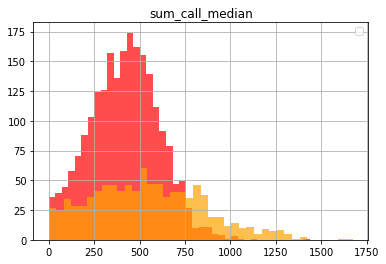

In [222]:
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'smart']['sum_call_median'].hist(bins=40,
                                                                           label='smart',
                                                                           color='red',
                                                                           alpha=0.7)
sum_call_pt_2[sum_call_pt_2['tariff_'] == 'ultra']['sum_call_median'].hist(bins=40,
                                                                           label='ultra',
                                                                           color='orange',
                                                                           alpha=0.7)
plt.title('sum_call_median')
plt.legend('')


По количеству СМС:
 - Медиана = 38.0
 - Среднеарифметическое = 45.28376886271623
 - Дисперсия = 1228.1458278273265
 - Стандартное отклонение = 35.04491158252973

        mes_mean   mes_var  mes_std
tariff                             
smart     38.720   717.590   26.790
ultra     61.160 2,109.660   45.930



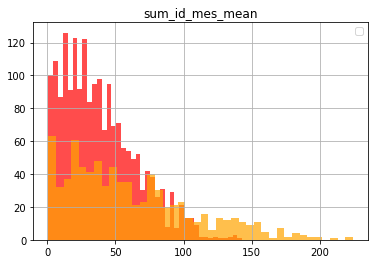

In [223]:
print() 
print('По количеству СМС:') 
print(' - Медиана =', revenue['sum_id_mes'].median()) 
print(' - Среднеарифметическое =', revenue['sum_id_mes'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_id_mes']))
print(' - Стандартное отклонение =', np.std(revenue['sum_id_mes']))
print()
print(revenue.groupby('tariff')
             .agg(mes_mean=('sum_id_mes','mean'),
                  mes_var=('sum_id_mes','var'),
                  mes_std=('sum_id_mes', 'std')).round(2))
# Посчитаем количество СМС в день
sum_id_mes_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'], 
                                    aggfunc={"sum_id_mes": [np.mean, np.median]}
                                   ).reset_index()
# Убираем второй этаж в шапке
sum_id_mes_pt.columns = ['_'.join(col).strip() for col in sum_id_mes_pt.columns.values]
sum_id_mes_pt_2 = sum_id_mes_pt.drop(columns=['user_id_',
                                              'month_'])
print()
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'smart']['sum_id_mes_mean'].hist(bins=40,
                                                                               label='smart',
                                                                               color='red',
                                                                               alpha=0.7)
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'ultra']['sum_id_mes_mean'].hist(bins=40,
                                                                               label='ultra',
                                                                               color='orange',
                                                                               alpha=0.7)
plt.title('sum_id_mes_mean')
plt.legend('')

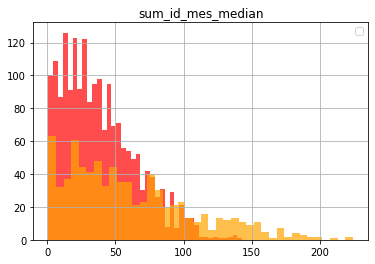

In [224]:
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'smart']['sum_id_mes_median'].hist(bins=40,
                                                                                 label='smart',
                                                                                 color='red',
                                                                                 alpha=0.7)
sum_id_mes_pt_2[sum_id_mes_pt_2['tariff_'] == 'ultra']['sum_id_mes_median'].hist(bins=40,
                                                                                 label='ultra',
                                                                                 color='orange',
                                                                                 alpha=0.7)
plt.title('sum_id_mes_median')
plt.legend('')


По мегабайтам:
 - Медиана = 17.0
 - Среднеарифметическое = 17.358413986887292
 - Дисперсия = 53.90837987607036
 - Стандартное отклонение = 7.342232622034688

        int_mean  int_var  int_std
tariff                            
smart     16.340   32.920    5.740
ultra     19.690   94.150    9.700



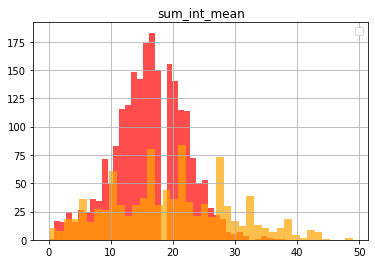

In [225]:
print() 
print('По мегабайтам:') 
print(' - Медиана =', revenue['sum_int'].median()) 
print(' - Среднеарифметическое =', revenue['sum_int'].mean())  
print(' - Дисперсия =', np.var(revenue['sum_int']))
print(' - Стандартное отклонение =', np.std(revenue['sum_int']))
print()
print(revenue.groupby('tariff')
             .agg(int_mean=('sum_int','mean'),
                  int_var=('sum_int','var'),
                  int_std=('sum_int', 'std')).round(2))
sum_int_pt = revenue.pivot_table(index=['user_id', 'month', 'tariff'],  
                                 aggfunc={"sum_int": [np.mean, np.median, np.var, np.std]}
                                ).reset_index()
# Убираем второй этаж в шапке
sum_int_pt.columns = ['_'.join(col).strip() for col in sum_int_pt.columns.values]
sum_int_pt_2 = sum_int_pt.drop(columns=['user_id_',
                                        'month_'])
print()
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'smart']['sum_int_mean'].hist(bins=40,
                                                                      label='smart',
                                                                      color='red',
                                                                      alpha=0.7)
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'ultra']['sum_int_mean'].hist(bins=40,
                                                                      label='ultra',
                                                                      color='orange',
                                                                      alpha=0.7)
plt.title('sum_int_mean')
plt.legend('')

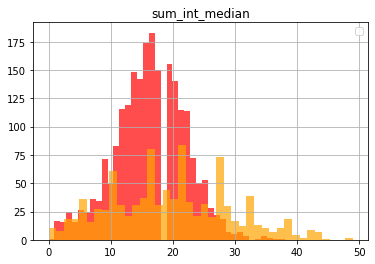

In [226]:
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'smart']['sum_int_median'].hist(bins=40,
                                                                        label='smart',
                                                                        color='red',
                                                                        alpha=0.7)
sum_int_pt_2[sum_int_pt_2['tariff_'] == 'ultra']['sum_int_median'].hist(bins=40,
                                                                        label='ultra',
                                                                        color='orange',
                                                                        alpha=0.7)
plt.title('sum_int_median')
plt.legend('')

## Шаг 4. Проверим гипотезы

	• средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
	• средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Средняя выручка от пользователей тарифов «Ультра» и «Смарт» различаются.

Выручка `smart`.

In [227]:
rev_smart = revenue[revenue['tariff'] == 'smart']['revenue']

Выручка `ultra`.

In [228]:
rev_ultra = revenue[revenue['tariff'] == 'ultra']['revenue']

Математика позволяет проверить альтернативную гипотезу:

    о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

In [229]:
print()
print('Средняя выручка smart: ',pd.Series(rev_smart).mean())
print('Средняя выручка ultra: ',pd.Series(rev_ultra).mean())
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(rev_smart, rev_ultra) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.\nСредние выручки пользователей тарифов «Ультра» и «Смарт» не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу.\nНеравенство средних выручек пользователей тарифов «Ультра» и «Смарт» не доказано.")


Средняя выручка smart:  1289.9735307312696
Средняя выручка ultra:  2070.1522842639592
p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу.
Средние выручки пользователей тарифов «Ультра» и «Смарт» не равны


### Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Добавляем столбец `city`.

In [230]:
revenue = revenue.assign(city = revenue.user_id)
for user_id in revenue['user_id']:
    cit = users[(users['user_id'] == user_id)]['city'].min()
    revenue['city'].where(~(revenue.city == user_id),
                          other=cit,
                          inplace=True)

Выручка по Москве.

In [231]:
rev_mos = revenue[revenue['city'] == 'Москва']['revenue']

Удаляем NaN, чтобы статистику не портили.

In [232]:
rev_mos = rev_mos.fillna(0)

Выручка по неМоскве.

In [233]:
rev_nmos = revenue[revenue['city'] != 'Москва']['revenue']
rev_nmos = rev_nmos.fillna(0)

Математика не позволяет проверить такую гипотезу, поэтому проверяем альтернативную:

    о том, что средняя выручка пользователей из Москвы такая же 
    что и выручки пользователей из других регионов.

In [234]:
print()
print('Средняя выручка в Москве: ',pd.Series(rev_mos).mean())
print('Средняя выручка вне Москвы: ',pd.Series(rev_nmos).mean())
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(rev_mos, rev_nmos) 
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.\nСредняя выручка от пользователей в Москве не равна выручке в регионах.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.\nРавенство средних выручек пользователей из Москвы и регионов не доказано.")


Средняя выручка в Москве:  1546.7135842880523
Средняя выручка вне Москвы:  1524.9362274298885
p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу.
Равенство средних выручек пользователей из Москвы и регионов не доказано.


## Шаг 5. Общий вывод

Исследование данных для корректировки рекламного бюджета, согласно прилагаемому заданию выполнено в полном объеме.
Полученные статистические данные можно использовать для определения: как улучшить тарифы. Все промежутоные выводы вынесены в содержание для простоты ориентирования и получения больших подробностей. А общие выводы таковы:

    - Оба тарифа избыточны по лимиту минут.
    - Тариф "ultra" по СМС' непомерный.
    - Тариф "ultra" по трафику превышающий потребности.

Также были проверены 2 гипотезы результатом которых получились следующие утверждения:

    - Средняя выручка smart:  1091.46
      Средняя выручка ultra:  1564.26
      Средние выручки пользователей тарифов «Ультра» и «Смарт» не равны
    - Средняя выручка в Москве:  1241.83
      Средняя выручка вне Москвы:  1235.08
      Равенство средних выручек пользователей из Москвы и регионов не доказано.